# Проект: "Разработка модели предсказания коэффициент восстановления золота из золотосодержащей руды"

## 1. Введение

Цель работы - подготовка модели прогноза коэффициента восстановления золота из золотосодержащей руды для оптимизации производства. 

Технологический процесс делиться на две стадии:

1. Флотация

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты

При подготовки модели необходимо спрогнозировать две величины:

1.	эффективность обогащения чернового концентрата;
2.	эффективность обогащения финального концентрата.


Основные шаги:

- Обзор и проверка данных
- Подготовка данных
- Исследовательский анализ данных
- Обучение моделей
- Тестирование лучшей модели
- Вывод


## 2. Подготовка данных

### 2.1 Обзор и проверка данных

Импортируем требуемые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import scipy.stats as st
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

Загрузим предоставленные данные:

In [2]:
pth1 = 'datasets/gold_recovery_train_new.csv'
pth2 = '/datasets/gold_recovery_train_new.csv'
if os.path.exists(pth1):
    df_gold_recovery_train = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_gold_recovery_train = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [3]:
pth1 = 'datasets/gold_recovery_test_new.csv'
pth2 = '/datasets/gold_recovery_test_new.csv'
if os.path.exists(pth1):
    df_gold_recovery_test = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_gold_recovery_test = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [4]:
pth1 = 'datasets/gold_recovery_full_new.csv'
pth2 = '/datasets/gold_recovery_full_new.csv'
if os.path.exists(pth1):
    df_gold_recovery_full = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_gold_recovery_full = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

Изучим общую информацию по загруженным данным:

In [5]:
df_gold_recovery_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


В таблице 87 столбцов и 14149 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 86 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 10.3 MB. 

In [6]:
df_gold_recovery_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

В таблице 53 столбцов и 5290 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 52 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 2.5 MB. 

In [7]:
df_gold_recovery_full.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


В таблице 87 столбцов и 19439 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 86 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 14.2 MB. 

In [8]:
df_gold_recovery_train.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1279,2016-03-15 00:00:00,3.252676,8.510433,6.465512,50.256024,63.569376,10.539983,1.501644,16.557457,2.993073,...,11.983650,-500.113407,11.916660,-499.869202,12.017091,-500.096001,10.045787,-499.866773,19.977368,-498.919943
8441,2017-07-04 09:59:59,4.159550,9.274852,8.455313,47.560917,53.332805,6.980069,2.411338,10.432519,2.695723,...,22.003392,-498.966317,15.113541,-378.897420,17.985623,-499.556697,13.018669,-500.107951,14.986287,-498.565282
11804,2018-04-24 13:59:59,6.243062,10.433451,10.120285,43.323904,75.553140,13.220890,2.245556,9.170673,2.560183,...,27.003779,-497.762251,19.996568,-499.000642,19.974292,-501.409662,14.997070,-499.648799,17.995196,-499.164998
2233,2016-05-10 21:59:59,4.619858,8.676903,8.039360,41.508499,63.541877,7.092973,1.807676,12.432769,2.496201,...,14.001545,-499.839196,11.911242,-499.871395,11.057948,-499.292751,5.921242,-500.440978,20.007057,-497.857448
4965,2017-01-18 13:59:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.135709,0.248237,10.817715,0.541934,...,14.015494,-496.764289,13.981879,-499.244981,-0.176485,-500.816086,8.093619,-500.197658,19.986522,-602.355855


Проверим правильность расчета эффективности обогащения `rougher.output.recovery`  на обучающей выборке:

In [9]:
rougher_output_recovery_estim = df_gold_recovery_train['rougher.output.recovery'] # имеющееся значение признака


c_check = df_gold_recovery_train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации
f_check = df_gold_recovery_train['rougher.input.feed_au'] # доля золота в сырье до флотации
t_check = df_gold_recovery_train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации

# расчетная величина коэффициента обогащения
rougher_output_recovery_check = ((c_check * (f_check - t_check)) / (f_check * (c_check - t_check))) * 100

#расчет MAE
mae_rougher = mean_absolute_error(rougher_output_recovery_estim, rougher_output_recovery_check)
print(mae_rougher)

9.73512347450521e-15


Значение MAE очень маленькое, преположим что расчет выполняется верно.

Пранализируем различие признаков между тестовой и обчающей выборками, а именно найдем отсуствующие в тестовой выборке признаки:

In [10]:
column_name_train = df_gold_recovery_train.columns # список названий столбцов обучающей выборки
column_name_test = df_gold_recovery_test.columns # список названий столбцов тестовой выборки

missed_names = [] # список пропущенных признаков

for i in column_name_train:
    if i not in column_name_test:
        missed_names.append(i)

print(missed_names)
print()
print('Число недоступных признаков в тестовой выборке:',len(missed_names))

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

По полученным результатам видно, что тестовая выборка не содержит 34 признака из обучающей выборки. При анализе "выбывших" признаков можно отметить, что это признаки выходных параметров (тип `outputs`) каждого этапа технологического процесса, а именно доли металлов в концентрате и хвостах после флотации, первичной отчиски и вторичной отчиски. Также в список выбывших признаков попали расчетные значения (тип `calculation`) для этапа флотации. Также отметим, что в списке выбывших имеется эффективность обогащения финального и чернового концентрата `final.output.recovery` и `rougher.output.recovery` соотвестенно.

Важно обозначить, что доля металлов (в частности золота) в концентрате и хвостах является целевым параметром, на оcновании которых раситывается эффективность обогащения. Отсуствие этих параметров в тестовой выборке не позволит в дальнейшем оценить качество модели. Далее учтем это в рамках предобработки данных.

### 1.2 Подготовка данных

Подготовим обучающую и тестовые выборки. 

Поменяем тип данных в столбце `date`, данные в котором буду является уникальным идентификатором для связи между полной, обучающей и тестовой выборками:

In [11]:
df_gold_recovery_train['date'] = pd.to_datetime(df_gold_recovery_train['date'], format='%Y-%m-%d %H:%M:%S')
df_gold_recovery_test['date'] = pd.to_datetime(df_gold_recovery_test['date'], format='%Y-%m-%d %H:%M:%S')
df_gold_recovery_full['date'] = pd.to_datetime(df_gold_recovery_full['date'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df_gold_recovery_train.set_index('date')
df_gold_recovery_test.set_index('date')
df_gold_recovery_full.set_index('date')

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


Удалим остуствующие признаки в тестовой выборки из обучающей:

In [13]:
df_gold_recovery_train_cut = df_gold_recovery_train.drop(missed_names, axis=1)

Так как для прогноза эффективности обогащения нужно найти долю золота в концентратах и хвостах на финальном этапе и после флотации (черновой концентрат), то выделим необходимые для обучения и оценки качества модели для обучающей и тестовой выборки, а именно:

  - `final.output.recovery` - параметр для оценки качества
  - `rougher.output.recovery` - параметр для оценки качества

Выделимм эти параметры для обучающей и тестовой выборки из полной выборки:

In [14]:
target_recovery_test_rougher = (
df_gold_recovery_full[df_gold_recovery_full.index
                      .isin(df_gold_recovery_test.index)]
                      ['rougher.output.recovery']
)

In [15]:
target_recovery_test_final = (
df_gold_recovery_full[df_gold_recovery_full['date']
                      .isin(df_gold_recovery_test['date'])]
                      ['final.output.recovery']
)

Проверим имеют ли пропуски вышеуказанные выборки:

In [16]:
print(target_recovery_test_rougher.isna().sum())
print()
print(target_recovery_test_final.isna().sum())

0

0


Из описания проекта известно, что "соседние по времени параметры часто похожи". Соотвественно пропущенные значения можно заполнить соседними данными. Заполним пропуски в тестовой и обучающей выборках:

In [18]:
df_gold_recovery_train_cut_clear = df_gold_recovery_train_cut.fillna(method='ffill')
df_gold_recovery_test_clear = df_gold_recovery_test.fillna(method='ffill')

In [19]:
print(df_gold_recovery_train_cut_clear.isna().sum())
print()
print(df_gold_recovery_test_clear.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

### Выводы:

* Выполнен обзор данных. Имеется 3 таблицы данны: тестовая выборка, обучающая выборка и полная выборка.

    
* **Для обучающей выборки:**
В таблице 87 столбцов и 14149 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 86       столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 10.3    MB. 


* **Для тестовой выборки:**
В таблице 53 столбцов и 5290 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 52 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 2.5 MB. 


* **Для полной выборки:**
В таблице 87 столбцов и 19439 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 86 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 14.2 MB. 



* Проверена правильность расчета эффективности обогащения `rougher.output.recovery`  на обучающей выборке, MAE = 9.73e-15

* Обнаружены пропущенные значения во всех табицах.

* Обнаружено, что тестовая выборка не содержит 34 признака из обучающей выборки,что связано с невозможность получить данные до конца технологического процесса. При анализе "выбывших" признаков можно отметить, что это признаки выходных параметров (тип `outputs`) каждого этапа технологического процесса, а именно доли металлов в концентрате и хвостах после флотации, первичной отчиски и вторичной отчиски. Также в список выбывших признаков попали расчетные значения (тип `calculation`) для этапа флотации. Также отметим, что в списке выбывших имеется эффективность обогащения финального и чернового концентрата `final.output.recovery` и `rougher.output.recovery` соотвестенно.


* В рамках подготовки данных было выполнено:
    -   Удалены отсуствующие в тестовой выборке признаки из обучающей выборки;
    -   Будут удалены столбцы, которые не являются признакми для обучения модели, это `date` (см.раздел 3.2);
    -   Выделены обучающая и тесовая выборки для обучения моделей на этапе флотации и на финальном этапе;
    -   Из полной выборки выделены выделены выборки из соотвествующих целевых признаков для обучения моделей на этапе флотации и на финальном этапе;
    - Из полной выборки выделены целевые коэффициенты обогащения для проерки качества моделей.
    - Во всех выборках устранены пропущенные значения.

## 3. Анализ данных

### 3.1 Анализ концентрации металла на различных этапах отчистки

Проведем анализ концентрации металлов (Au, Ag, Pb) на разных этапах отчистки. Анализ проведем на базе данных полной выборки `df_gold_recovery_full`:

Text(0, 0.5, '')

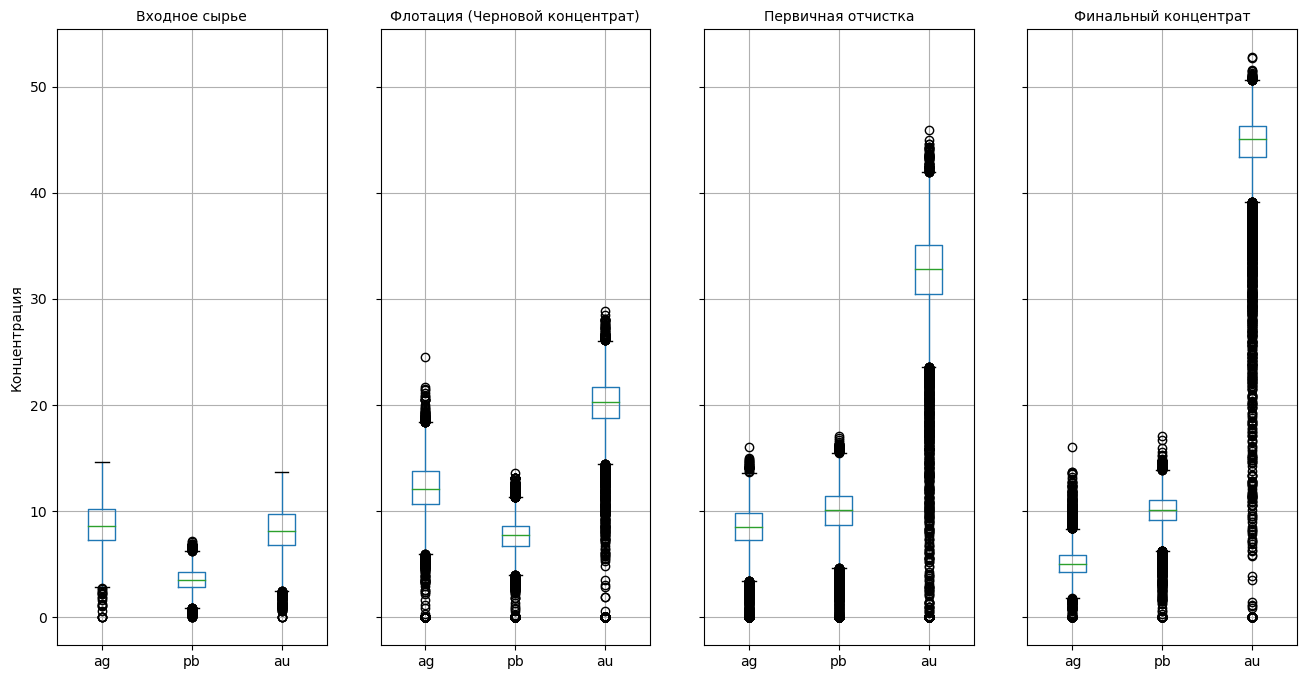

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(16,8))

df_gold_recovery_full.rename(
    columns={"rougher.input.feed_ag": "ag", 
             "rougher.input.feed_pb": "pb", 
             "rougher.input.feed_au": "au"}).boxplot(column=['ag','pb','au'], ax=ax1)
                                            

df_gold_recovery_full.rename(
    columns={"rougher.output.concentrate_ag": "ag", 
             "rougher.output.concentrate_pb": "pb", 
             "rougher.output.concentrate_au": "au"}).boxplot(column=['ag','pb','au'], ax=ax2)
    
df_gold_recovery_full.rename(
    columns={"primary_cleaner.output.concentrate_ag": "ag", 
             "primary_cleaner.output.concentrate_pb": "pb", 
             "primary_cleaner.output.concentrate_au": "au"}).boxplot(column=['ag','pb','au'], ax=ax3)
    
df_gold_recovery_full.rename(
    columns={"final.output.concentrate_ag": "ag", 
             "final.output.concentrate_pb": "pb", 
             "final.output.concentrate_au": "au"}).boxplot(column=['ag','pb','au'], ax=ax4)

ax1.set_title('Входное сырье', fontsize=10)
ax1.set_ylabel('Концентрация')
ax2.set_title('Флотация (Черновой концентрат)', fontsize=10)
ax2.set_ylabel('')
ax3.set_title('Первичная отчистка', fontsize=10)
ax3.set_ylabel('')
ax4.set_title('Финальный концентрат', fontsize=10)
ax4.set_ylabel('')

In [42]:
df_gold_recovery_full[['rougher.input.feed_ag',
                       'rougher.input.feed_pb', 
                       'rougher.input.feed_au']].describe()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au
count,19439.000000,19339.000000,19439.000000
mean,8.794927,3.598085,8.266097
std,1.936847,1.049486,1.955092
min,0.010000,0.010000,0.010000
25%,7.237967,2.887280,6.854384
50%,8.593574,3.534895,8.125839
75%,10.213771,4.244161,9.769917
max,14.596026,7.142594,13.731330


In [43]:
df_gold_recovery_full[['rougher.output.concentrate_ag',
                       'rougher.output.concentrate_pb', 
                       'rougher.output.concentrate_au']].describe()

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au
count,19439.000000,19439.000000,19439.000000
mean,11.994759,7.606272,19.772000
std,2.733862,1.796757,3.753600
min,0.000000,0.000000,0.000000
25%,10.628337,6.725987,18.802523
50%,12.098115,7.742580,20.280214
75%,13.736996,8.565199,21.717843
max,24.480271,13.617072,28.824507


In [44]:
df_gold_recovery_full[['primary_cleaner.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_pb', 
                       'primary_cleaner.output.concentrate_au']].describe()

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au
count,19439.000000,19323.000000,19439.000000
mean,8.442408,9.829530,32.119400
std,2.054465,2.556843,5.627611
min,0.000000,0.000000,0.000000
25%,7.263288,8.702328,30.463140
50%,8.507298,10.152433,32.841295
75%,9.809001,11.424971,35.048006
max,16.081632,17.081278,45.933934


In [45]:
df_gold_recovery_full[['final.output.concentrate_ag',
                       'final.output.concentrate_pb', 
                       'final.output.concentrate_au']].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
count,19438.000000,19438.000000,19439.000000
mean,5.168470,9.978895,44.076513
std,1.372348,1.669240,5.129784
min,0.000000,0.000000,0.000000
25%,4.251240,9.137262,43.402215
50%,5.066094,10.102433,45.011244
75%,5.895527,11.035769,46.275313
max,16.001945,17.031899,52.756638


По результатам анализа видно изменение концентраций на разных этапах отчиски. Медиана концентрации золота в сырье составляет 8.125 с ростом медианы концентрации на каждом последующем этапе и достижением 45.01 на финальном этапе. Также можно отметить небольшой рост концентации свинца после этапа флотации, отсуствия динамик на этах последующей отчистки. Динамика изменения концентраций серебра показывает увеличение значения на этапе флотации, и возвращение к исходным показателям на финальном этапе. 

### 3.2 Анализ суммарной концентрации всех веществ на разных стадиях

Проведем анализ суммарной концентрации всех веществ на стадии сырья, чернового концентрата и финального концентрата. Рассчитаем концентрации на каждой стадии:

In [46]:
df_gold_recovery_full['rougher.input.feed_total'] = (df_gold_recovery_full['rougher.input.feed_au'] + 
                                                     df_gold_recovery_full['rougher.input.feed_pb'] + 
                                                     df_gold_recovery_full['rougher.input.feed_ag'] + 
                                                     df_gold_recovery_full['rougher.input.feed_sol'])

In [47]:
df_gold_recovery_full['rougher.output.concentrate_total'] = (df_gold_recovery_full['rougher.output.concentrate_au'] + 
                                                     df_gold_recovery_full['rougher.output.concentrate_pb'] + 
                                                     df_gold_recovery_full['rougher.output.concentrate_ag'] + 
                                                     df_gold_recovery_full['rougher.output.concentrate_sol'])

In [48]:
df_gold_recovery_full['final.output.concentrate_total'] = (df_gold_recovery_full['final.output.concentrate_au'] + 
                                                     df_gold_recovery_full['final.output.concentrate_pb'] + 
                                                     df_gold_recovery_full['final.output.concentrate_ag'] + 
                                                     df_gold_recovery_full['final.output.concentrate_sol'])

Построим диаграмму размаха:

Text(0, 0.5, '')

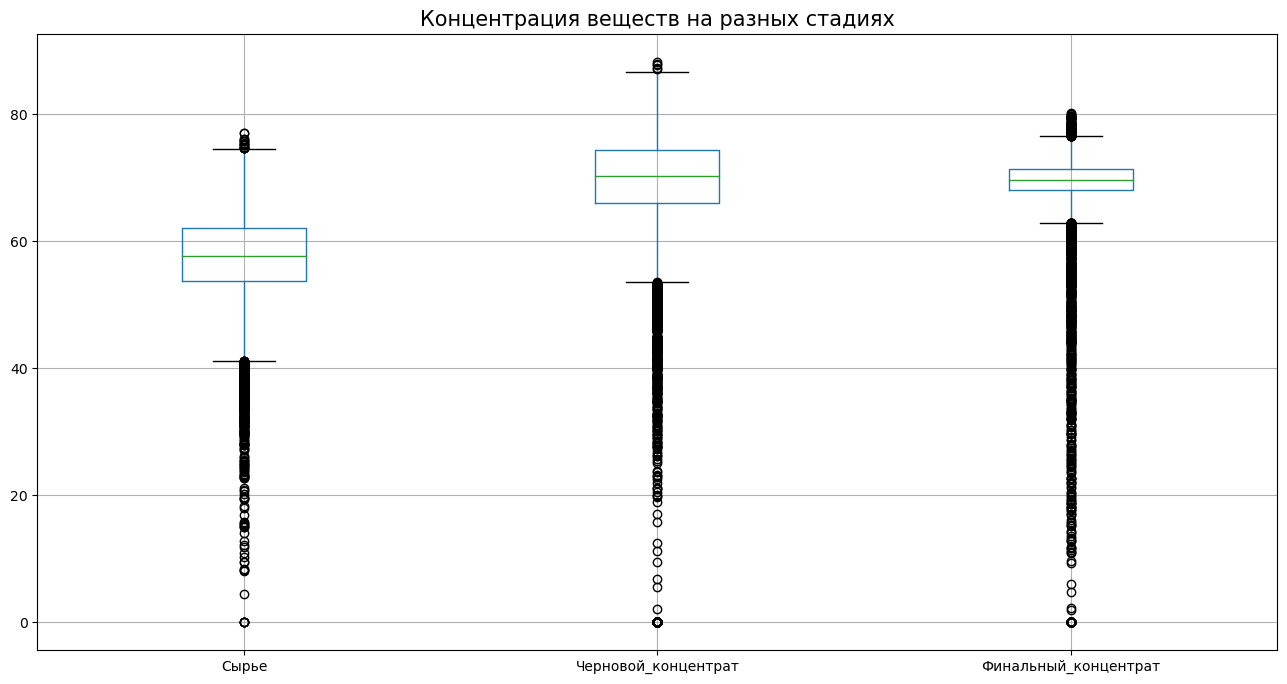

In [49]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,8))

df_gold_recovery_full.rename(
    columns={"rougher.input.feed_total": "Сырье", 
             "rougher.output.concentrate_total": "Черновой_концентрат", 
             "final.output.concentrate_total": "Финальный_концентрат"}).boxplot(
                column=['Сырье','Черновой_концентрат','Финальный_концентрат'], ax=ax)

ax.set_title('Концентрация веществ на разных стадиях', fontsize=15)
ax.set_ylabel('')

In [50]:
df_gold_recovery_full[['rougher.input.feed_total',
                       'rougher.output.concentrate_total', 
                       'final.output.concentrate_total']].describe()

,rougher.input.feed_total,rougher.output.concentrate_total,final.output.concentrate_total
count,19245.000000,19416.000000,19227.000000
mean,57.407926,68.188914,68.727562
std,7.165219,12.478522,7.423741
min,0.040000,0.000000,0.000000
25%,53.660745,66.026048,67.985659
50%,57.647093,70.186130,69.632597
75%,62.012223,74.362878,71.390461
max,76.978947,88.140119,80.210644


Из анализа данных видно, что суммарная концентрация веществ увеличивается на стадии чернового концентрата, но на финальном этапе незначительно снижается (медиана на черновом концентрате составляет 70.1, на финальном 69.6, при этом размах значений на финальном этапе сокращается. Также отмечены нулевые значения, что может быть следствием отсуствия веществ на стадии сырья. Преположим, что аномалий в данных нет, так как распределения концентрация выглядят идетично на каждом этапе.

Отчистим данные для обучения моделей (train выборка) от аномалий. Выберем пороговым значения сумарную концентрацию не менее 1:

In [32]:
around_zero_concentrate_index = df_gold_recovery_full.query(
'`rougher.input.feed_total` < 1 or `rougher.output.concentrate_total` < 1 or `final.output.concentrate_total` < 1')['date']

In [51]:
around_zero_concentrate_index

45      2016-01-16 21:00:00
46      2016-01-16 22:00:00
47      2016-01-16 23:00:00
48      2016-01-17 00:00:00
49      2016-01-17 02:00:00
                ...        
16227   2018-03-12 03:59:59
16228   2018-03-12 04:59:59
16229   2018-03-12 05:59:59
16230   2018-03-12 06:59:59
17567   2018-05-15 04:59:59
Name: date, Length: 496, dtype: datetime64[ns]

In [52]:
df_gold_recovery_train_cut_clear_all = (
df_gold_recovery_train_cut_clear.drop(df_gold_recovery_train_cut_clear[df_gold_recovery_train_cut_clear['date']
                      .isin(around_zero_concentrate_index)].index)
)


In [53]:
df_gold_recovery_train_for_target = (
df_gold_recovery_train.drop(df_gold_recovery_train[df_gold_recovery_train['date']
                      .isin(around_zero_concentrate_index)].index)
)

In [54]:
target_train_rougher_stage = df_gold_recovery_train_for_target['rougher.output.recovery']
target_train_final_stage = df_gold_recovery_train_for_target['final.output.recovery']

Удалим столбец `date` , так как он не будет участвовать в процессе обучения модели и подготовим итоговые выборки к обучению:

In [55]:
#признаки для обучения на этапе флотации
features_rougher_stage_train = (
df_gold_recovery_train_cut_clear_all.loc[:, 'rougher.input.feed_ag':'rougher.state.floatbank10_f_level']
)


#признаки для обучения на финальном этапе
features_final_stage_train_1 = (
df_gold_recovery_train_cut_clear_all.
    drop(df_gold_recovery_train_cut_clear.
         loc[:,'rougher.input.feed_ag':'rougher.state.floatbank10_f_level'], axis=1)
)

features_final_stage_train = features_final_stage_train_1.drop('date', axis=1)

In [56]:
#признаки для тестовой выборки на этапе флотации
features_rougher_stage_test = (
df_gold_recovery_test_clear.loc[:, 'rougher.input.feed_ag':'rougher.state.floatbank10_f_level']
)


#признаки для тестовой выборки на финальном этапе
features_final_stage_test_1 = (
df_gold_recovery_test_clear.
    drop(df_gold_recovery_test_clear.
         loc[:,'rougher.input.feed_ag':'rougher.state.floatbank10_f_level'], axis=1)
)

features_final_stage_test = features_final_stage_test_1.drop('date', axis=1)

Проверим размерности полученных выборок:

In [57]:
print('Размерность выборки для обучения на этапе флотации:',features_rougher_stage_train.shape)
print('Размерность выборки для целевых параметров на этапе флотации:',target_train_rougher_stage.shape)
print('Размерность выборки для обучения на финальном этапе:',features_final_stage_train.shape)
print('Размерность выборки для целевых параметров на финальном этапе:',target_train_final_stage.shape)

print('Размерность тестовой выборки на этапе флотации:',features_rougher_stage_test.shape)
print('Размерность выборки для оценки качества на этапе флотации:',target_recovery_test_rougher.shape)

print('Размерность тестовой выборки на финальном этапе:',features_final_stage_test.shape)
print('Размерность выборки для оценки качества на этапе флотации:',target_recovery_test_final.shape)


Размерность выборки для обучения на этапе флотации: (13789, 22)
Размерность выборки для целевых параметров на этапе флотации: (13789,)
Размерность выборки для обучения на финальном этапе: (13789, 30)
Размерность выборки для целевых параметров на финальном этапе: (13789,)
Размерность тестовой выборки на этапе флотации: (5290, 22)
Размерность выборки для оценки качества на этапе флотации: (5290,)
Размерность тестовой выборки на финальном этапе: (5290, 30)
Размерность выборки для оценки качества на этапе флотации: (5290,)


### 3.3 Анализ размера гранул сырья

Для проверки возможности будущей модели правильно выполнять оценку, проведем анализ распределения гранул сырья в обучающей и тестовой выборках:

Text(0, 0.5, 'Размер гранул сырья')

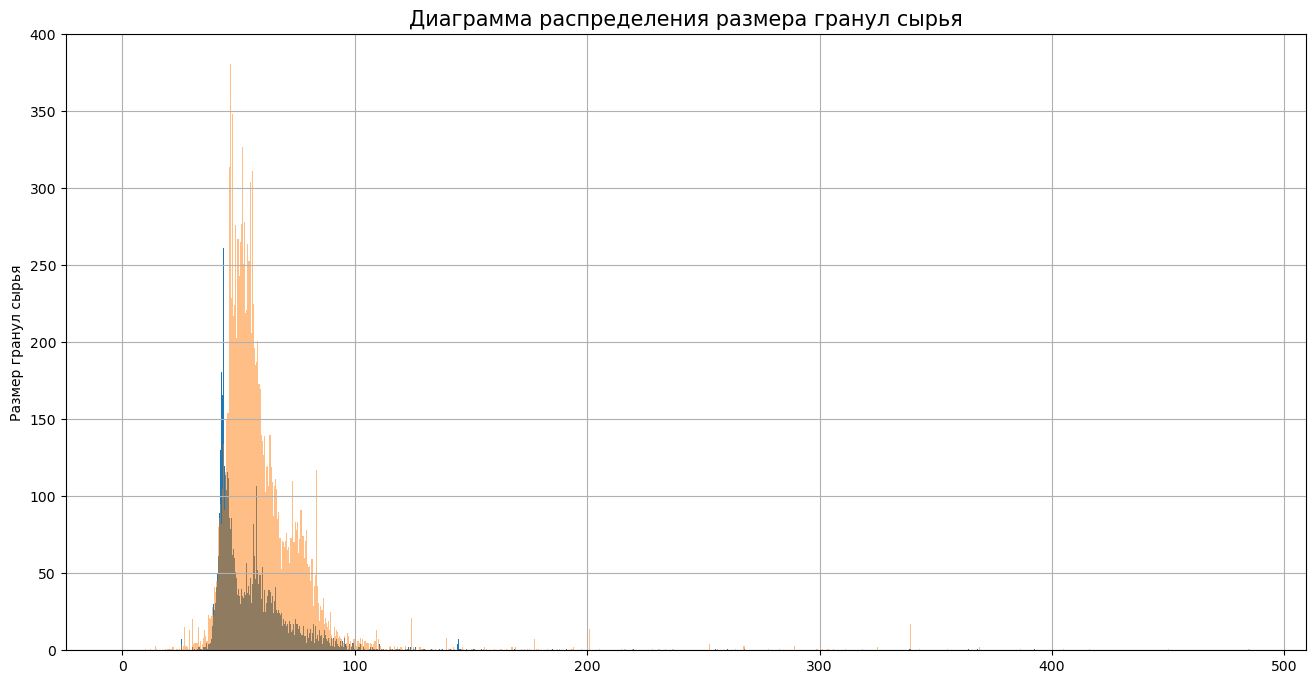

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,8))
features_rougher_stage_test.hist(column='rougher.input.feed_size', bins=1000, ax=ax)
features_rougher_stage_train.hist(column='rougher.input.feed_size', bins=1000,alpha=0.5, ax=ax)

ax.set_title('Диаграмма распределения размера гранул сырья', fontsize=15)
ax.set_ylabel('Размер гранул сырья')

При визуальном анализе распределений, видно что для обоих выработок размер гранул сырья лежит в одинаковых диапазонах. Следовательно преположительно оценка модели должна быть верной.

### Выводы:

* По результатам анализа видно изменение концентраций на разных этапах отчиски. Медиана концентрации золота в сырье составляет 8.125 с ростом медианы концентрации на каждом последующем этапе и достижением 45.01 на финальном этапе. Также можно отметить небольшой рост концентации свинца после этапа флотации, отсуствия динамик на этах последующей отчистки. Динамика изменения концентраций серебра показывает увеличение значения на этапе флотации, и возвращение к исходным показателям на финальном этапе. 

* При визуальном анализе распределений, видно что для обоих выработок размер гранул сырья лежит в одинаковых диапазонах. Следовательно преположительно оценка модели должна быть верной.

* Суммарная концентрация веществ увеличивается на стадии чернового концентрата, но на финальном этапе незначительно снижается (медиана на черновом концентрате составляет 70.1, на финальном 69.6, при этом размах значений на финальном этапе сокращается. Также отмечены нулевые значения, что может быть следствием отсуствия веществ на стадии сырья. 

* Убрали аномалии из обучающей выборки.

## 4. Модель

### 4.1 Функция для вычисления итоговой метрики качества sMAPE

Напишем функцию для вычисления sMAPE и итоговой метрики качества (итоговое sMAPE):

In [60]:
def smape_score(target, prediction):
    
    """"
    Функция расчета SMAPE
    
    """
    abs_difference = abs(target - prediction)
    sum_of_abs = (abs(target) + abs(prediction)) / 2
    total_sum =  (abs_difference / sum_of_abs).sum()
    smape = total_sum / len(prediction)
    return smape
    

In [61]:
def total_smape_score(smape_rough, smape_fin):
    
    """"
    Функция расчета итогового SMAPE
    
    """
    
    total_smape = 0.25 * smape_rough + 0.75 * smape_fin
    return total_smape

### 4.2 Обучение и сравнение моделей

Обучим несколько моделей и проверим среднее качество каждой модели кросс-валидацией. С учетом того, что метрика качества sMAPE рассчитывается для коэффициента обогащения и на этапе флотации, и на финальном этапе,  напишем функции для кросс-валидации и оценки средней метрики качества:

In [62]:
def cross_val (model, features, target):
    scores = cross_val_score(model, features, target, scoring=make_scorer(smape_score, greater_is_better=False), cv=5)
    final_score = pd.Series(abs(scores)).mean()
    print(f'Средняя оценка качества модели: {final_score:,.1%}') 
    return final_score

Выполним масштабирование признаков для этапа флотации и для финального этапа:

In [63]:
numeric_rougher = features_rougher_stage_train.columns
scalar_rougher = StandardScaler()
scalar_rougher.fit(features_rougher_stage_train[numeric_rougher])
features_rougher_stage_train[numeric_rougher] =  scalar_rougher.transform(features_rougher_stage_train[numeric_rougher])

In [64]:
numeric_final= features_final_stage_train.columns
scalar_final = StandardScaler()
scalar_final.fit(features_final_stage_train[numeric_final])
features_final_stage_train[numeric_final] =  scalar_final.transform(features_final_stage_train[numeric_final])

### 4.2.1. Модель линейной регрессии (Linear Regression)

Обучим модель линейной регрессии и проверим среднее качество модели кросс-валидацией:

In [65]:
model_lr_rougher = LinearRegression()

lr_rougher = cross_val(model_lr_rougher, features_rougher_stage_train, target_train_rougher_stage )

Средняя оценка качества модели: 6.6%


In [66]:
model_lr_final = LinearRegression()

lr_final = cross_val(model_lr_final, features_final_stage_train, target_train_final_stage )

Средняя оценка качества модели: 9.9%


In [67]:
total_smape_lr = total_smape_score(lr_rougher, lr_final)
print(f'Итоговое SMAPE линейной регрессии: {total_smape_lr:,.1%}')

Итоговое SMAPE линейной регрессии: 9.0%


### 4.2.2. Модель регрессии решающего дерева (DecisionTreeRegressor)

Найдем модели регресии решающего дерева с лучшими гиперпараметрами для каждого этапа и вычислим итоговое sMAPE:

In [68]:
%%time

best_model_tree_rougher = None
best_result_tree_rougher = 1

for depth in range(1, 11):
    model_tree_rougher = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    tree_rougher = cross_val(model_tree_rougher, features_rougher_stage_train, target_train_rougher_stage)
    
    if tree_rougher < best_result_tree_rougher:
        best_model_tree_rougher = model_tree_rougher
        best_result_tree_rougher = tree_rougher
        best_depth = depth

print('Лучшая модель регрессии решающего дерева на этапе флотации с глубиной:',best_depth)

Средняя оценка качества модели: 8.0%
Средняя оценка качества модели: 7.5%
Средняя оценка качества модели: 7.1%
Средняя оценка качества модели: 7.1%
Средняя оценка качества модели: 7.0%
Средняя оценка качества модели: 7.1%
Средняя оценка качества модели: 7.8%
Средняя оценка качества модели: 8.5%
Средняя оценка качества модели: 8.3%
Средняя оценка качества модели: 8.0%
Лучшая модель регрессии решающего дерева на этапе флотации с глубиной: 5
Wall time: 5.25 s


In [69]:
%%time

best_model_tree_final = None
best_result_tree_final = 1

for depth in range(1, 11):
    model_tree_final = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    tree_final = cross_val(model_tree_final, features_final_stage_train, target_train_final_stage)
    
    if tree_final < best_result_tree_final:
        best_model_tree_final = model_tree_final
        best_result_tree_final = tree_final
        best_depth = depth

print('Лучшая модель регрессии решающего дерева на финальном этапе с глубиной:',best_depth)

Средняя оценка качества модели: 10.1%
Средняя оценка качества модели: 10.4%
Средняя оценка качества модели: 11.3%
Средняя оценка качества модели: 14.4%
Средняя оценка качества модели: 14.1%
Средняя оценка качества модели: 16.0%
Средняя оценка качества модели: 16.2%
Средняя оценка качества модели: 16.4%
Средняя оценка качества модели: 14.6%
Средняя оценка качества модели: 17.7%
Лучшая модель регрессии решающего дерева на финальном этапе с глубиной: 1
Wall time: 7.4 s


In [70]:
total_smape_tree = total_smape_score(best_result_tree_rougher, best_result_tree_final)
print(f'Итоговое SMAPE регрессии решающего дерева : {total_smape_tree:,.3%}')

Итоговое SMAPE регрессии решающего дерева : 9.347%


### 4.2.3. Модель регрессии Случайный лес (RandomForestRegressor)

Найдем модели регресии Случайный лес с лучшими гиперпараметрами для каждого этапа и вычислим итоговое sMAPE:

In [71]:
%%time

best_model_rf_rougher = None
best_result_rf_rougher = 1

for est in range(100, 900, 300):
        for depth in range(1, 10, 3):
            model_rf_rougher = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            rf_rougher = cross_val(model_rf_rougher, features_rougher_stage_train, target_train_rougher_stage)
    
            if rf_rougher < best_result_rf_rougher:
                best_model_rf_rougher = model_rf_rougher
                best_result_rf_rougher = rf_rougher
                best_estimators_rf = est
                best_depth = depth

print(f'Лучшая модель регрессии на этапе флотации c кол-вом деревьев {best_estimators_rf} и глубиной {best_depth}')

Средняя оценка качества модели: 7.7%
Средняя оценка качества модели: 6.7%
Средняя оценка качества модели: 6.7%
Средняя оценка качества модели: 7.8%
Средняя оценка качества модели: 6.7%
Средняя оценка качества модели: 6.7%
Средняя оценка качества модели: 7.7%
Средняя оценка качества модели: 6.7%
Средняя оценка качества модели: 6.7%
Лучшая модель регрессии на этапе флотации c кол-вом деревьев 700 и глубиной 4
Wall time: 13min 54s


In [72]:
%%time

best_model_rf_final = None
best_result_rf_final = 1

for est in range(100, 900, 300):
        for depth in range(1, 10, 3):
            model_rf_final = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            rf_final = cross_val(model_rf_final, features_final_stage_train, target_train_final_stage)
    
            if rf_final < best_result_rf_final:
                best_model_rf_final = model_rf_final
                best_result_rf_final = rf_final
                best_estimators_rf_final = est
                best_depth_final = depth

print(f'Лучшая модель регрессии на финальном этапе c кол-вом деревьев {best_estimators_rf_final} и глубиной {best_depth_final}')

Средняя оценка качества модели: 10.0%
Средняя оценка качества модели: 11.6%
Средняя оценка качества модели: 12.0%
Средняя оценка качества модели: 10.0%
Средняя оценка качества модели: 11.4%
Средняя оценка качества модели: 12.0%
Средняя оценка качества модели: 10.0%
Средняя оценка качества модели: 11.4%
Средняя оценка качества модели: 12.0%
Лучшая модель регрессии на финальном этапе c кол-вом деревьев 400 и глубиной 1
Wall time: 15min 53s


In [73]:
total_smape_rf = total_smape_score(best_result_rf_rougher, best_result_rf_final)
print(f'Итоговое SMAPE регрессии решающего дерева : {total_smape_rf:,.3%}')

Итоговое SMAPE регрессии решающего дерева : 9.157%


### 4.2.4. Dummy модель (Стационарная модель)

Поверим адекватность моделей, сравнив их со стационарной:

In [74]:
model_dummy_rougher = DummyRegressor(strategy='mean')

dummy_rougher = cross_val(model_dummy_rougher, features_rougher_stage_train, target_train_rougher_stage )

Средняя оценка качества модели: 7.8%


In [75]:
model_dummy_final = DummyRegressor(strategy='mean')

dummy_final = cross_val(model_dummy_final, features_final_stage_train, target_train_final_stage )

Средняя оценка качества модели: 10.4%


In [76]:
total_smape_dummy = total_smape_score(dummy_rougher, dummy_final)
print(f'Итоговое SMAPE стационарной модели : {total_smape_dummy:,.3%}')

Итоговое SMAPE стационарной модели : 9.767%


Сведем полученные результаты в таблицу:

In [77]:
results = {'Total_SMAPE': [total_smape_lr, total_smape_tree, total_smape_rf, total_smape_dummy]}

train_results = pd.DataFrame(data=results, index=['LinearRegression','DecisionTree','RandomForest','Dummy'])

display(train_results)

,Total_SMAPE
LinearRegression,0.090362
DecisionTree,0.093472
RandomForest,0.091570
Dummy,0.097671


### Вывод:

* Написана функция для вычисления sMAPE и итоговой метрики качества (итоговое sMAPE).

* Выполнено масштабирование признаков.

* Рассмотрено и обучено три типа моделей: Линейная регрессия, Регрессия Решающего дерева и Регрессия Случайный лес. Определены лучшие гиперпараметры. Произведено сравнение со стационарной моделью.

* По резульататом метрики качества (итоговая sMAPE) определено, что лучшая модель - Линейная регрессия sMAPE = 9.03 %.

* Вторая лучшая модель - Регрессия Случайный лес со следующими гиперпараметрами и sMAPE = 9.15 %:

  - На стадии флотации: Число деревьев 700 глубина 4;
  - На финальной стадии: Число деревьев 400 глубина 1.
  
* Стационарная модель имеет итоговое sMAPE = 9.76 %, что хуже чем выбранная модель, поэтому можно предполагать, что подготовленная модель Регрессия Случайный лес показывает лучший результат.

## 5. Проверка лучшей модели

Выполним проверку выбранной лучшей модели Линейная регрессия :

In [78]:
%%time

features_rougher_stage_test[numeric_rougher] =  scalar_rougher.transform(features_rougher_stage_test[numeric_rougher])

best_model_rougher = LinearRegression()
best_model_rougher.fit(features_rougher_stage_train, target_train_rougher_stage)
prediction_rougher = best_model_rougher.predict(features_rougher_stage_test)
test_smape_rougher = smape_score(target_recovery_test_rougher, prediction_rougher)
print(f'sMAPE на этапе флотации на тестовой выборке: {test_smape_rougher:,.3%}')

sMAPE на этапе флотации на тестовой выборке: 13.391%
Wall time: 18 ms


In [79]:
%%time

features_final_stage_test[numeric_final] =  scalar_final.transform(features_final_stage_test[numeric_final])

best_model_final = LinearRegression()
best_model_final.fit(features_final_stage_train, target_train_final_stage)
prediction_final = best_model_final.predict(features_final_stage_test)
test_smape_final = smape_score(target_recovery_test_final, prediction_final)
print(f'sMAPE на финальном этапе на тестовой выборке: {test_smape_final:,.3%}')

sMAPE на финальном этапе на тестовой выборке: 10.194%
Wall time: 18.8 ms


In [80]:
total_smape_test = total_smape_score(test_smape_rougher, test_smape_final)
print(f'Итоговое SMAPE на тестовой выборке : {total_smape_test:,.3%}')

Итоговое SMAPE на тестовой выборке : 10.993%


In [81]:
test_dummy_model_rougher = DummyRegressor(strategy='mean')
test_dummy_model_rougher.fit(features_rougher_stage_train, target_train_rougher_stage)
dummy_test_prediction_rougher = test_dummy_model_rougher.predict(features_rougher_stage_test)
test_dummy_smape_rougher = smape_score(target_recovery_test_rougher, dummy_test_prediction_rougher)
print(f'sMAPE на этапе флотации на тестовой выборке стационарной модели: {test_dummy_smape_rougher:,.3%}')

sMAPE на этапе флотации на тестовой выборке стационарной модели: 12.289%


In [82]:
test_dummy_model_final = DummyRegressor(strategy='mean')
test_dummy_model_final.fit(features_final_stage_train, target_train_final_stage)
dummy_test_prediction_final = test_dummy_model_final.predict(features_final_stage_test)
test_dummy_smape_final = smape_score(target_recovery_test_final, dummy_test_prediction_final)
print(f'sMAPE на финальном этапе на тестовой выборке стационарной модели: {test_dummy_smape_final:,.3%}')

sMAPE на финальном этапе на тестовой выборке стационарной модели: 10.079%


In [83]:
total_smape_test_dummy = total_smape_score(test_dummy_smape_rougher, test_dummy_smape_final)
print(f'Итоговое SMAPE на тестовой выборке : {total_smape_test_dummy:,.3%}')

Итоговое SMAPE на тестовой выборке : 10.631%


## 6. Выводы

***На этапе обзора и подготовки данных***:

* Выполнен обзор данных. Имеется 3 таблицы данны: тестовая выборка, обучающая выборка и полная выборка.

    
* **Для обучающей выборки:**
В таблице 87 столбцов и 14149 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 86       столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 10.3    MB. 


* **Для тестовой выборки:**
В таблице 53 столбцов и 5290 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 52 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 2.5 MB. 


* **Для полной выборки:**
В таблице 87 столбцов и 19439 строк, имеются нулевые значения (или пропущенные) в ряде столбцов. Типы данных: 86 столбцов с вещественными значениями типа float64, 1 столбец со строковым типом object. Используемый объем памяти 14.2 MB. 



* Проверена правильность расчета эффективности обогащения `rougher.output.recovery`  на обучающей выборке, MAE = 9.73e-15

* Обнаружены пропущенные значения во всех табицах.

* Обнаружено, что тестовая выборка не содержит 34 признака из обучающей выборки,что связано с невозможность получить данные до конца технологического процесса. При анализе "выбывших" признаков можно отметить, что это признаки выходных параметров (тип `outputs`) каждого этапа технологического процесса, а именно доли металлов в концентрате и хвостах после флотации, первичной отчиски и вторичной отчиски. Также в список выбывших признаков попали расчетные значения (тип `calculation`) для этапа флотации. Также отметим, что в списке выбывших имеется эффективность обогащения финального и чернового концентрата `final.output.recovery` и `rougher.output.recovery` соотвестенно.


* В рамках подготовки данных было выполнено:
    -   Удалены отсуствующие в тестовой выборке признаки из обучающей выборки;
    -   Удалены столбцы, которые не являются признакми для обучения модели, это `date`;
    -   Выделены обучающая и тесовая выборки для обучения моделей на этапе флотации и на финальном этапе;
    -   Из полной выборки выделены выделены выборки из соотвествующих целевых признаков для обучения моделей на этапе флотации и на финальном этапе;
    - Из полной выборки выделены целевые коэффициенты обогащения для проерки качества моделей.
    - Во всех выборках устранены пропущенные значения.
    

***На этапе исследовательского анализа***:

* По результатам анализа видно изменение концентраций на разных этапах отчиски. Медиана концентрации золота в сырье составляет 8.125 с ростом медианы концентрации на каждом последующем этапе и достижением 45.01 на финальном этапе. Также можно отметить небольшой рост концентации свинца после этапа флотации, отсуствия динамик на этах последующей отчистки. Динамика изменения концентраций серебра показывает увеличение значения на этапе флотации, и возвращение к исходным показателям на финальном этапе. 

* При визуальном анализе распределений, видно что для обоих выработок размер гранул сырья лежит в одинаковых диапазонах. Следовательно преположительно оценка модели должна быть верной.

* Суммарная концентрация веществ увеличивается на стадии чернового концентрата, но на финальном этапе незначительно снижается (медиана на черновом концентрате составляет 70.1, на финальном 69.6, при этом размах значений на финальном этапе сокращается. Также отмечены нулевые значения, что может быть следствием отсуствия веществ на стадии сырья. Удалены аномалии с нулевыми значениями и околонулевыми значениями концентраций.


***На этапе выбора и обучения модели***:

* Написана функция для вычисления sMAPE и итоговой метрики качества (итоговое sMAPE).

* Выполнено масштабирование признаков.

* Рассмотрено и обучено три типа моделей: Линейная регрессия, Регрессия Решающего дерева и Регрессия Случайный лес. Определены лучшие гиперпараметры. Произведено сравнение со стационарной моделью.

* По резульататом метрики качества (итоговая sMAPE) определено, что лучшая модель - Линейная регрессия sMAPE = 9.03 %.

* Вторая лучшая модель - Регрессия Случайный лес со следующими гиперпараметрами и sMAPE = 9.15 %:

  - На стадии флотации: Число деревьев 700 глубина 4;
  - На финальной стадии: Число деревьев 400 глубина 1.
  
* Стационарная модель имеет итоговое sMAPE = 9.76 %, что хуже чем выбранная модель, поэтому можно предполагать, что подготовленная модель Регрессия Случайный лес показывает лучший результат.

* На этапе тестирования лучшей модели получена итоговая sMAPE = 10.79 %.
